In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/My\ Drive/archive.zip


Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
# prompt: Set the directory paths

train_dir = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
validation_dir = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [ ]:
# prompt: Check the contents of the dataset directory

!ls {train_dir}
!ls {validation_dir}

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `ls /content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `ls /content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'


In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]]
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [ ]:
# Install nightly package for some functionalities that aren't in alpha
!pip install tf-nightly-gpu-2.0-preview

# Install TF Hub for TF2
!pip install 'tensorflow-hub == 0.4'

  Preparing metadata (setup.py) ... done
  Created wheel for tf-nightly-gpu-2.0-preview: filename=tf_nightly_gpu_2_0_preview-0.0.0.1-py3-none-any.whl size=1543 sha256=2b62ad2c6770675aa8c5365684fbf1a9127ced63e8bf4233c2f772fa6024038c
  Stored in directory: /root/.cache/pip/wheels/89/c6/2e/5b35865ca6234c39a564b7803e8105a8050cb66121a475b27c
Successfully built tf-nightly-gpu-2.0-preview
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 711.0 kB/s eta 0:00:00
  Attempting uninstall: tensorflow-hub
    Found existing installation: tensorflow-hub 0.16.1
    Uninstalling tensorflow-hub-0.16.1:
      Successfully uninstalled tensorflow-hub-0.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.15.0 requires tensorflow-hub>=0.13.0, but you have tensorflow-hub 0.4.0 which is incompatible.


In [ ]:
!pip install tensorflow==2.8.0 tensorflow-hub==0.12.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 158.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 43.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorflow-hub
    Found existing installation: tensorflow-hub 0.4.0
    Uninstalling tensorflow-hub-0.4.0:
      Successfully uninstalled tensorflow-hub-0.4.0
  Attempting uninstall: tensorbo

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)
#tf.enable_eager_execution()

import tensorflow_hub as hub
import os
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
#from keras import optimizers


In [ ]:
# verify TensorFlow version

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Version:  2.8.0
Eager mode:  True
Hub version:  0.12.0
GPU is NOT AVAILABLE


In [ ]:
import time
import os
from os.path import exists

def count(dir, counter=0):
    "returns number of files in dir and subdirs"
    for pack in os.walk(dir):
        for f in pack[2]:
            counter += 1
    return dir + " : " + str(counter) + "files"


In [ ]:
print('total images for training :', count(train_dir))
print('total images for validation :', count(validation_dir))

total images for training : /content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train : 70295files
total images for validation : /content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid : 17572files


In [ ]:
print(f"Train directory: {train_dir}")


Train directory: /content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train


In [ ]:
if os.path.exists(train_dir):
    print(os.listdir(train_dir))
else:
    print("Train directory does not exist.")


['Peach___Bacterial_spot', 'Tomato___Bacterial_spot', 'Pepper,_bell___healthy', 'Grape___Esca_(Black_Measles)', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Apple___healthy', 'Peach___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Corn_(maize)___healthy', 'Apple___Apple_scab', 'Cherry_(including_sour)___healthy', 'Tomato___Septoria_leaf_spot', 'Apple___Cedar_apple_rust', 'Grape___Black_rot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Tomato___Early_blight', 'Cherry_(including_sour)___Powdery_mildew', 'Tomato___healthy', 'Raspberry___healthy', 'Potato___Early_blight', 'Blueberry___healthy', 'Corn_(maize)___Common_rust_', 'Tomato___Late_blight', 'Soybean___healthy', 'Grape___healthy', 'Tomato___Tomato_mosaic_virus', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Apple___Black_rot', 'Potato___Late_blight', 'Potato___healthy', 'Pepper,_bell___Bacterial_spot', 'Squash___Powdery_

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Assuming you have already defined data_dir, train_dir, and validation_dir
BATCH_SIZE = 100
IMG_HEIGHT = 224
IMG_WIDTH = 224


In [ ]:
image_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
# prompt: Label mapping


train_data_gen = image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')

class_names = list(train_data_gen.class_indices.keys())
print(class_names)


Found 70295 images belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites T

In [ ]:
# prompt: count train data foulder

import os

train_count = len(os.listdir(train_dir))
print(f"Train data folder count: {train_count}")


Train data folder count: 38


In [ ]:
# prompt: TensorFlow Hub to load a model as a feature extractor.

# Load the pre-trained model from TensorFlow Hub
feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze the pre-trained layers
feature_extractor_layer.trainable = False


In [ ]:
import tensorflow_hub as hub
from tensorflow.keras.applications import MobileNetV2  # Example base model

# Define the module handle and base model
MODULE_HANDLE = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4"
IMAGE_SIZE = (224, 224)
FV_SIZE = 1280  # Example feature vector size

# Load the feature extractor
feature_extractor = hub.KerasLayer(MODULE_HANDLE,
                                   input_shape=IMAGE_SIZE + (3,),
                                   output_shape=[FV_SIZE],
                                   trainable=False)  # By default, set to non-trainable

# Define the base model (e.g., MobileNetV2) if you need to fine-tune
base_model = MobileNetV2(input_shape=IMAGE_SIZE + (3,), include_top=False)

# Fine-tuning control
do_fine_tuning = False  # Set to True if you want to fine-tune

if do_fine_tuning:
    feature_extractor.trainable = True  # Make the feature extractor trainable
    # Unfreeze the last 30 layers for fine-tuning
    for layer in base_model.layers[-30:]:
        layer.trainable = True
else:
    feature_extractor.trainable = False  # Keep the feature extractor non-trainable


9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import tensorflow_hub as hub

# Define the feature extractor
MODULE_HANDLE = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4"
IMAGE_SIZE = (224, 224)

# Load the feature extractor layer from TensorFlow Hub
feature_extractor_layer = hub.KerasLayer(MODULE_HANDLE, input_shape=IMAGE_SIZE + (3,), trainable=False)

# Create the model
model = tf.keras.Sequential([
    feature_extractor_layer,
    layers.Flatten(),  # Flatten the multi-dimensional output from the feature extractor
    layers.Dense(512, activation='relu'),  # Optional dense layer for further processing
    layers.Dense(train_data_gen.num_classes, activation='softmax')  # Output layer
])

# Compile the model
model.compile(
    optimizer=Adam(epsilon=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dense_1 (Dense)             (None, 38)                19494     
                                                                 
Total params: 2,933,350
Trainable params: 675,366
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
# prompt: Specify Loss Function and Optimizer

# Compile the model
model.compile(
    optimizer=Adam(epsilon=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Initialize the ImageDataGenerator for validation data (usually no data augmentation for validation)
image_generator = ImageDataGenerator(rescale=1./255)

# Define directories and parameters

IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

# Data Preprocessing
val_data_gen = image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                   directory=validation_dir,
                                                   shuffle=False,
                                                   target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                   class_mode='categorical')

# Count the number of files in the validation folder
val_count = len(os.listdir(validation_dir))
print(f"Validation data folder count: {val_count}")



Found 17572 images belonging to 38 classes.
Validation data folder count: 38


In [ ]:
# Data Preprocessing
val_data_gen = image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                   directory=validation_dir,
                                                   shuffle=False,
                                                   target_size=(224, 224), # Changed to match the model's input size
                                                   class_mode='categorical')

Found 17572 images belonging to 38 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Set consistent image size for MobileNetV2 (224x224)
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
EPOCHS = 5
NUM_CLASSES = 38  # Update to the number of classes in your dataset

# Data augmentation for training data
train_image_generator = ImageDataGenerator(rescale=1./255)

# No augmentation for validation data
validation_image_generator = ImageDataGenerator(rescale=1./255)

# Load training data
train_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Load validation data
val_data_gen = validation_image_generator.flow_from_directory(
    directory=validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Check the number of training and validation samples
train_count = train_data_gen.samples
val_count = val_data_gen.samples

# Build the model using MobileNetV2 as the base
base_model = MobileNetV2(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), include_top=False, weights='imagenet')

# Add custom layers on top of MobileNetV2
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Ensure pooling to avoid size mismatch
x = Dense(512, activation='relu')(x)  # Optional dense layer
predictions = Dense(NUM_CLASSES, activation='softmax')(x)  # Output layer

# Combine base model and new custom layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model (MobileNetV2) layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(epsilon=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model training
history = model.fit(
    train_data_gen,
    steps_per_epoch=train_count // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=val_count // BATCH_SIZE
)

# Optionally, you can unfreeze some layers for fine-tuning after the initial training


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
Epoch 1/5
2196/2196 [==============================] - 523s 237ms/step - loss: 0.4434 - accuracy: 0.8733 - val_loss: 0.2216 - val_accuracy: 0.9282
Epoch 2/5
2196/2196 [==============================] - 561s 256ms/step - loss: 0.1599 - accuracy: 0.9479 - val_loss: 0.1497 - val_accuracy: 0.9494
Epoch 3/5
2196/2196 [==============================] - 539s 245ms/step - loss: 0.1106 - accuracy: 0.9629 - val_loss: 0.1367 - val_accuracy: 0.9537
Epoch 4/5
2196/2196 [==============================] - 546s 249ms/step - loss: 0.0827 - accuracy: 0.9732 - val_loss: 0.1363 - val_accuracy: 0.9548
Epoch 5/5
2196/2196 [==============================] - 540s 246ms/step - loss: 0.0664 - accuracy: 0.9783 - val_loss: 0.1157 - val_accuracy: 0.9627


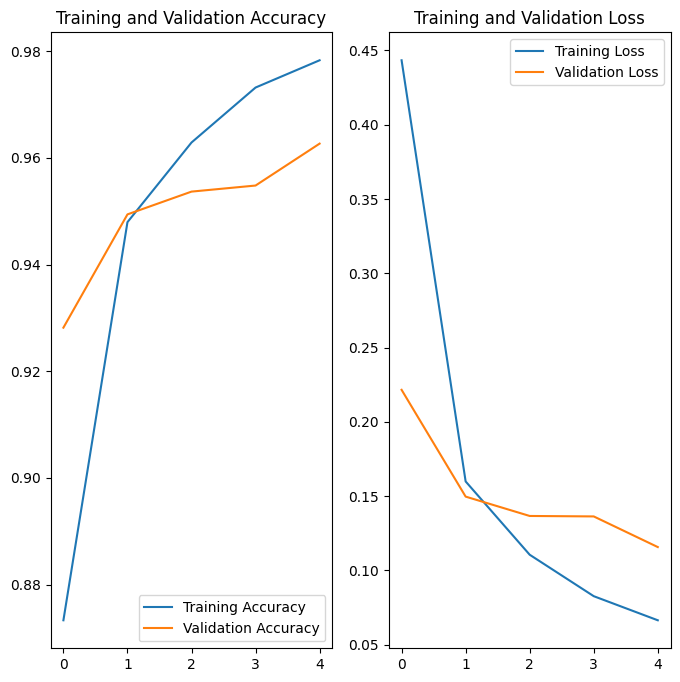

In [ ]:
# prompt: Plot training and validation accuracy and loss

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


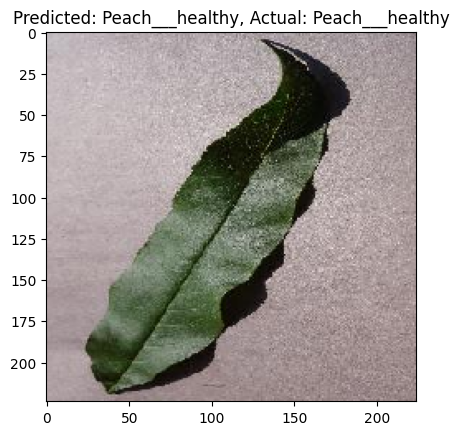

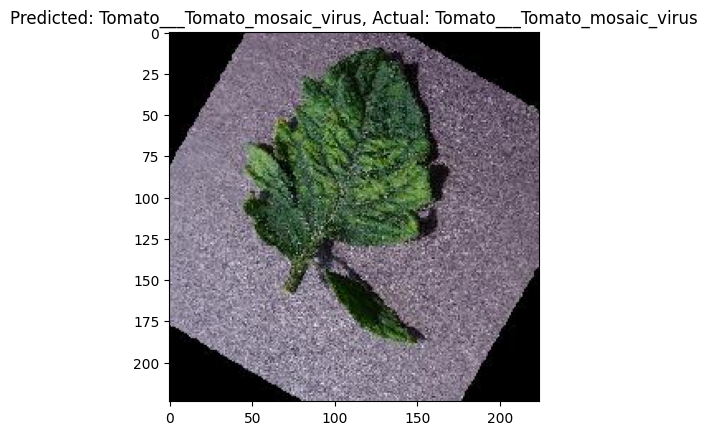

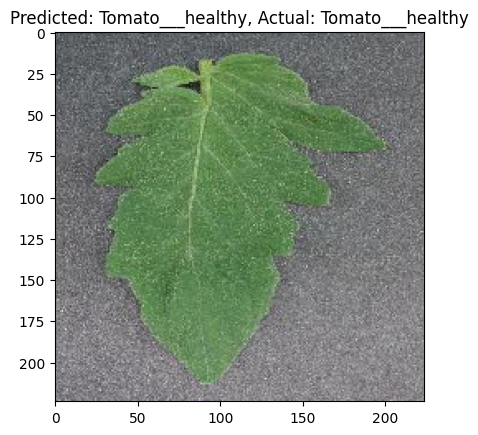

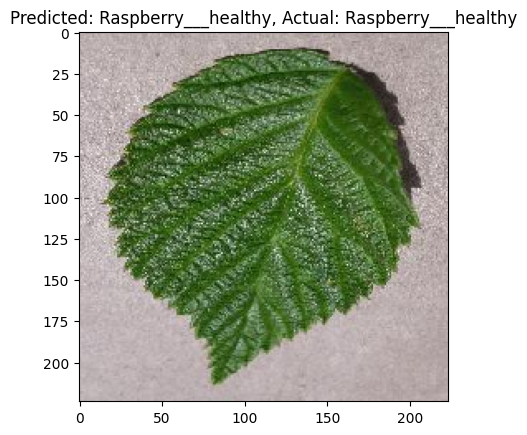

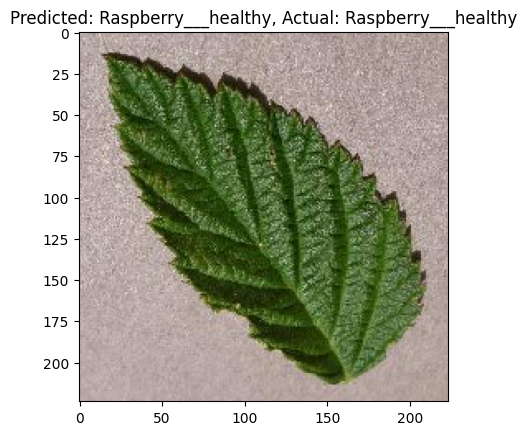

In [ ]:
# prompt: Random sample images from validation dataset and predict

import numpy as np
import matplotlib.pyplot as plt

# Get a batch of validation data
images, labels = next(val_data_gen)

# Choose a random sample of images
num_samples = 5  # Number of images to sample
random_indices = np.random.choice(images.shape[0], size=num_samples, replace=False)
sampled_images = images[random_indices]
sampled_labels = labels[random_indices]

# Make predictions
predictions = model.predict(sampled_images)

# Display the images and predictions
for i in range(num_samples):
  plt.imshow(sampled_images[i])
  plt.title(f"Predicted: {class_names[np.argmax(predictions[i])]}, Actual: {class_names[np.argmax(sampled_labels[i])]}")
  plt.show()


In [ ]:
!pip install tensorflow

import tensorflow as tf

#Set consistent image size for MobileNetV2 (224x224)
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
EPOCHS = 5
NUM_CLASSES = 38  # Update to the number of classes in your dataset

# *** Add this line to define train_dir with the path to your training data
train_dir = '/path/to/your/training/data'

# Data augmentation for training data
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# No augmentation for validation data
validation_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Load training data
train_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Load validation data
# *** Add this line to define validation_dir with the path to your validation data
validation_dir = '/path/to/your/validation/data'

val_data_gen = validation_image_generator.flow_from_directory(
    directory=validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Check the number of training and validation samples
train_count = train_data_gen.samples
val_count = val_data_gen.samples

# Build the model using MobileNetV2 as the base
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), include_top=False, weights='imagenet')

# Add custom layers on top of MobileNetV2
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Ensure pooling to avoid size mismatch
x = tf.keras.layers.Dense(512, activation='relu')(x)  # Optional dense layer
predictions = tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')(x)  # Output layer

# Combine base model and new custom layers
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model (MobileNetV2) layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Convert the model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

FileNotFoundError: [Errno 2] No such file or directory: '/path/to/your/training/data'

In [ ]:
# Convert the model to TensorFlow Lite format here
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model as a .tflite file
with open('tree_disease_model.tflite', 'wb') as f:
    f.write(tflite_model)